## CUNY SPS, DATA 620: Web Analytics
June 21st, 2019

Project 2: Two-Mode Network

Overview: This analysis aims to explore the network of current NBA players to answer the simple question, Which players have been teammates?

To answer the above question, the dataset contains one row per NBA player per year. For example, LeBron James has 16 rows in the dataset. One for each of the 16 NBA seasons he played. Furthermore, each row has the team the player was on.

Lastly, this is a two mode network because it has two types of nodes: players and teams. 

### Part 1: Setup Network

In [39]:
# import the needed packages
import csv
import math
import networkx as net
from networkx.algorithms import bipartite as bi
import matplotlib as plot
import pandas as pd

In [40]:
# open the dataset (as a csv)
nba_data = csv.reader(open("NBA_network.csv"))

In [41]:
# create the empty graph, and empty lists for the players and teams
g = net.Graph()
teams = []
players = []

In [42]:
# enter all nodes and edges into the graph
for row in nba_data:
    if row[0] not in teams:
        teams.append(row[0])
    if row[1] not in players:
        players.append(row[1])
    g.add_edge(row[0], row[1], weight=1)

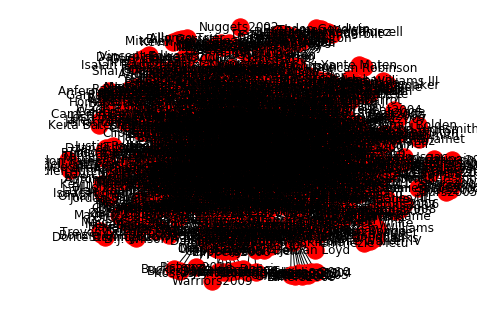

In [43]:
# draw the graph, as a giant blob
net.draw(g, with_labels=True)

In [44]:
# for some clarity, print the nodes in the network
print "nodes in network:", len(g)
print "======"
print "teams in network:", len(teams)
print "players in network:", len(players)

nodes in network: 958
teams in network: 429
players in network: 529


In [45]:
# look at components of the network
connected_net = list(net.connected_component_subgraphs(g))
print "size of largest component:", len(connected_net[0])

size of largest component: 958


Since the largest component is equal to the number of total nodes, every player is somehow connected to every other player!

### Part 2: Create Affiliation Networks

In [46]:
# create an affiliation network of only teams
teamnet = bi.weighted_projected_graph(g, teams)

In [47]:
# create an affiliation network of only players
# this will become our main network..
playernet = bi.weighted_projected_graph(g, players)

### Part 3: Explore Centrality of Players

In [48]:
# look at degree centrality among players
deg = net.degree(playernet)
deg_list = sorted(playernet.degree, key=lambda x: x[1], reverse=True)
#print "LeBron James' degree:", deg['LeBron James']
print "top 10 highest degree:"
deg_list[0:9]
#print "ok, this list looks like players that have stayed in NBA but bounced around.."

top 10 highest degree:


[('Anthony Tolliver', 78),
 ('Michael Beasley', 70),
 ('Jerryd Bayless', 69),
 ('Omri Casspi', 67),
 ('Marco Belinelli', 67),
 ('Corey Brewer', 65),
 ('Jose Calderon', 64),
 ('Quincy Acy', 64),
 ('Jeremy Lin', 64)]

In [49]:
# look at closeness centrality of players
import operator
closeness_cen = net.closeness_centrality(playernet)
closeness_list = sorted(closeness_cen.items(), key=operator.itemgetter(1))
#print "LeBron James' closeness:", closeness_cen['LeBron James']
print "top 10 highest closeness:"
closeness_list[520:529]

top 10 highest closeness:


[('Jeremy Lin', 0.5057471264367817),
 ('Kosta Koufos', 0.5067178502879078),
 ('Jerryd Bayless', 0.5067178502879078),
 ('Michael Beasley', 0.5072046109510087),
 ('Jeff Green', 0.5076923076923077),
 ('Gerald Green', 0.5076923076923077),
 ('Channing Frye', 0.5101449275362319),
 ('Jose Calderon', 0.5146198830409356),
 ('Anthony Tolliver', 0.5285285285285285)]

In [50]:
# look at betweenness centrality of players
betweenness_cen = net.betweenness_centrality(playernet)
betweenness_list = sorted(betweenness_cen.items(), key=operator.itemgetter(1))
#print "LeBron James' betweenness:", betweenness_cen['LeBron James']
print "top 10 highest betweenness:"
betweenness_list[520:529]

top 10 highest betweenness:


[('Nick Young', 0.012360261612535874),
 ('Lance Stephenson', 0.0125911356338536),
 ('Corey Brewer', 0.012893688940697852),
 ('Marco Belinelli', 0.01307538296740316),
 ('Shelvin Mack', 0.013442039285576829),
 ('Jerryd Bayless', 0.015531495100122753),
 ('Michael Beasley', 0.01579274666872784),
 ('Anthony Tolliver', 0.01689635299197223),
 ('Isaiah Thomas', 0.017729800949966054)]

### Part 4: Implement the Island Method

In [53]:
# now, to see the players with the highest degree (start of the island method..)
print "degree, number of players"
deg_tests = [30, 40, 50, 60, 70, 80]
num_players = 0
for i in deg_tests:    
    for j in players:
        if deg(j)>i:
            num_players = num_players + 1
    print i, num_players
    num_players = 0

degree, number of players
30 253
40 138
50 57
60 16
70 1
80 0


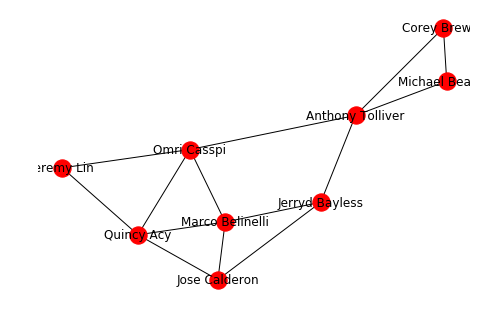

In [64]:
# let's look at only the players with 47+ degree
playernet64 = playernet.copy()
for i in players:
    if deg(i)<64:
        playernet64.remove_node(i)
net.draw(playernet64, with_labels=True)

In [65]:
deg_list = sorted(playernet64.degree, key=lambda x: x[1], reverse=True)
deg_list[0:9]

[('Omri Casspi', 4),
 ('Anthony Tolliver', 4),
 ('Quincy Acy', 4),
 ('Marco Belinelli', 4),
 ('Jose Calderon', 3),
 ('Jerryd Bayless', 3),
 ('Corey Brewer', 2),
 ('Michael Beasley', 2),
 ('Jeremy Lin', 2)]

### Part 5: Looking at the Network of Current All Stars

In [66]:
all_stars = ['James Harden',
             'Kevin Durant',
             'Kyrie Irving',
             'Kawhi Leonard',
             'LeBron James',
             'Anthony Davis',
             'Ben Simmons',
             'Bradley Beal',
             'Damian Lillard',
             'Dwayne Wade',
             'Karl-Anthony Towns',
             'Klay Thompson',
             'LaMarcus Aldridge',
             'Giannis Antetokounmpo',
             'Stephen Curry',
             'Joel Embiid',
             'Paul George',
             'Kemba Walker',
             'Blake Griffin',
             'DAngelo Russell',
             'Dirk Nowitzki',
             'Khris Middleton',
             'Kyle Lowry',
             'Nikola Jokic',
             'Nikola Vucevic',
             'Victor Oladipo',
             'Russell Westbrook']

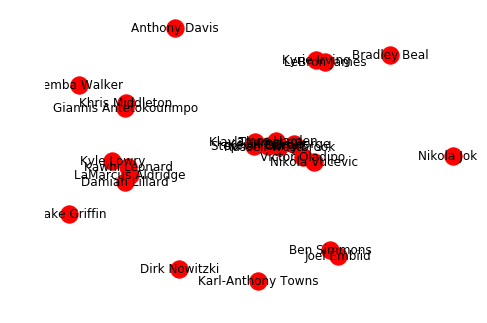

In [67]:
all_star_network = playernet.copy()
for i in players:
    if i not in all_stars:
        all_star_network.remove_node(i)
net.draw(all_star_network, with_labels=True)

In [70]:
deg_list = sorted(all_star_network.degree, key=lambda x: x[1], reverse=True)
deg_list[0:4]

[('Kevin Durant', 4),
 ('Russell Westbrook', 4),
 ('Stephen Curry', 2),
 ('LaMarcus Aldridge', 2)]

In [77]:
# look at components of the network
connected_net = list(net.connected_component_subgraphs(all_star_network))
print "size of largest all star component:", len(connected_net[0])

size of largest all star component: 4


### Part 6: Summary

From the above code there are some valuable insights about the NBA network:

First, the most connected player in the league based on all 2 types of centrality is Anthony Tolliver. Followed closely after him are Jeremy Lin and Michael Beasley

Then, of the current NBA All Stars, the two all stars that have played with the most all stars are Kevin Durant and Russell Westbrook